In [8]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score , roc_auc_score
from sklearn import metrics
from skopt import forest_minimize

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importando os dados
df = pd.read_csv('train.csv').drop(['id','Vintage','Annual_Premium'],axis=1)
y_data = df['Response'].values

df = df.drop('Response',axis=1)
df.head(3)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
0,Male,44,1,28.0,0,> 2 Years,Yes,26.0
1,Male,76,1,3.0,0,1-2 Year,No,26.0
2,Male,47,1,28.0,0,> 2 Years,Yes,26.0


In [3]:
# Transformando as variaveis
lb1 = LabelEncoder()
df['Gender']= lb1.fit_transform(df['Gender'])

lb2 = LabelEncoder()
df['Vehicle_Age']= lb2.fit_transform(df['Vehicle_Age'])

lb3 = LabelEncoder()
df['Vehicle_Damage']= lb3.fit_transform(df['Vehicle_Damage'])


In [4]:
# Separando os dados
x_train,x_test,y_train,y_test = train_test_split(df,
                                                y_data,test_size=0.3,
                                                random_state=0)

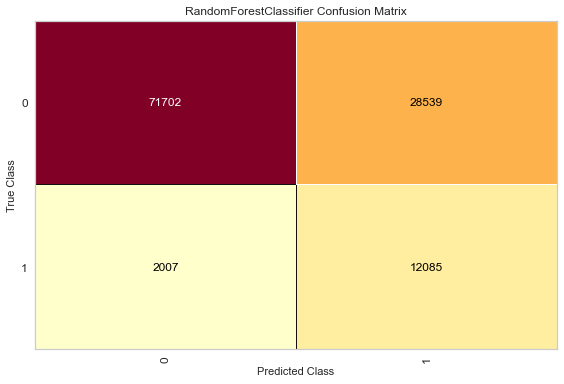

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [5]:
# Criando a random forest, variando em especial o parametros "min_samples_leaf"
rd = ConfusionMatrix(RandomForestClassifier(n_estimators = 200,random_state=0,min_samples_leaf=5,class_weight = 'balanced', n_jobs=6))
rd.fit(x_train,y_train)
rd.score(x_test, y_test)
rd.poof()

In [13]:
predicts = rd.predict(x_test)

print(' Random Forest ')
print(metrics.classification_report(y_test, predicts))

p = rd.predict_proba(x_test)[:,1]
print(f'AUC: {roc_auc_score(y_test,p)} \nAVG: {average_precision_score(y_test,p)} ')


 Random Forest 
              precision    recall  f1-score   support

           0       0.97      0.72      0.82    100241
           1       0.30      0.86      0.44     14092

    accuracy                           0.73    114333
   macro avg       0.64      0.79      0.63    114333
weighted avg       0.89      0.73      0.78    114333

AUC: 0.8497923998338571 
AVG: 0.3543187226711151 
